In [1]:
import os
os.chdir("../")

In [2]:
%display plain

# Incubator Case Study

In [3]:
from lbuc import *

from sage.symbolic.function_factory import function_factory

from verified_twin.base import *
from verified_twin.parametric_models import IntervalParametricModel
from verified_twin.incubator_models import *

## 2 Parameter Model

$$
    \frac{\mathrm d T_{\mathrm{system}}}{\mathrm d t} =
    \frac{1}{C_{\mathrm{system}}}\bigl(
        V I - G_{\mathrm{box}} \bigl(T_{\mathrm{system}} - T_{\mathrm{room}}\bigr)
    \bigr)
$$

$$
    \frac{\mathrm d T_{S}}{\mathrm d t} =
    \frac{1}{C_S}\bigl(
        V I - G_B \bigl(T_S - T_R\bigr)
    \bigr)
$$

In [4]:
twopincubator.ode_table

\(\frac{\partial}{\partial t}T_{S}\left(t\right) = \frac{G_{B} {\left(T_{R} - T_{S}\left(t\right)\right)} + I V}{C_{S}}\)


In [5]:
r = twopincubator.reach(100)

plot_points = 10000


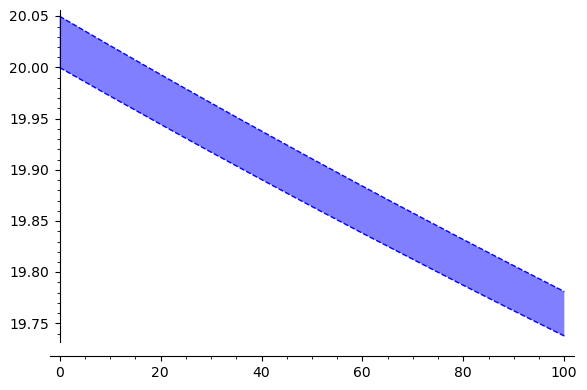

In [6]:
r.sage_plot(T_S, color="blue", fillcolor='blue', linestyle="--", fill={0: [1]})

Computed 241 flowpipes in 0.022431671037338674 sec
In G.signal
mask for G = None


/home/sage/sage/local/lib/python3.9/site-packages/sage/plot/contour_plot.py:206: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


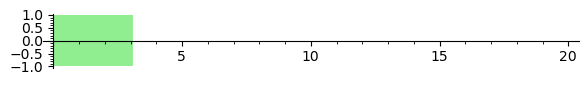

In [7]:
G(RIF("[0, 4]"), Atomic(T_S > RIF("19.98"))).signal_for_system(twopincubator, 20, symbolic_composition=True).plot()

## 4 Parameter Model

\begin{alignat*}{4}
    \frac{\mathrm d T_{\mathrm{heater}}}{\mathrm d t} & =
    \frac{1}{C_{\mathrm{heater}}}&&\bigl(
        V I - G_{\mathrm{heater}} \bigl(T_{\mathrm{heater}} - T_{\mathrm{box}}\bigr)
    \bigr) \\
    \frac{\mathrm d T_{\mathrm{bair}}}{\mathrm d t} & =
    \frac{1}{C_{\mathrm{air}}}&&\bigl(
        G_{\mathrm{heater}} \bigl(T_{\mathrm{heater}} - T_{\mathrm{bair}}\bigr)
        - G_{\mathrm{box}}\bigl(T_{\mathrm{bair}} - T_{\mathrm{room}}\bigr)
    \bigr)
\end{alignat*}

or

\begin{alignat*}{4}
    \frac{\mathrm d T_H}{\mathrm d t} & =
    \frac{1}{C_H}&&\bigl(
        V I - G_H \bigl(T_H - T_A\bigr)
    \bigr) \\
    \frac{\mathrm d T_A}{\mathrm d t} & =
    \frac{1}{C_A}&&\bigl(
        G_H \bigl(T_H - T_A\bigr)
        - G_B\bigl(T_A - T_R\bigr)
    \bigr)
\end{alignat*}

In [14]:
fourpincubator.ode_table

\(\frac{\partial}{\partial t}T_{H}\left(t\right) = \frac{I V + G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{H}}\)
\(\frac{\partial}{\partial t}T_{A}\left(t\right) = \frac{G_{B} {\left(T_{R} - T_{A}\left(t\right)\right)} - G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{A}}\)


In [15]:
r = fourpincubator.reach(100)

plot_points = 10000
plot_points = 10000


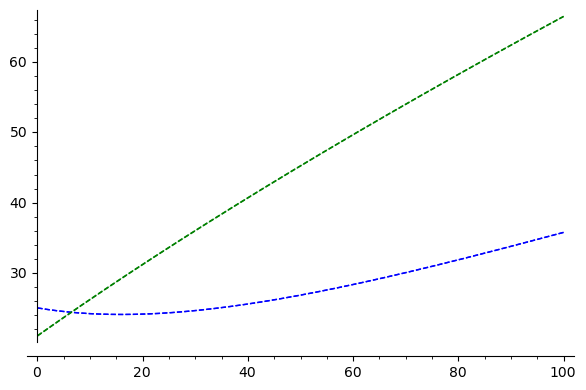

In [16]:
r.sage_plot(T_A, color='blue', fillcolor='blue', linestyle="--", fill={0: [1]}) + r.sage_plot(T_H, color='green', fillcolor='green', linestyle="--", fill={0: [1]})

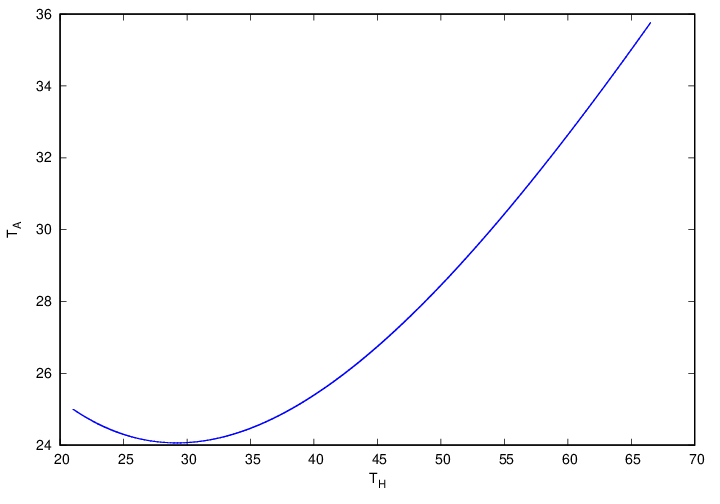

In [17]:
r.wplot("T_H", "T_A")

Computed 1041 flowpipes in 0.279975445009768 sec
In G.signal
mask for G = None


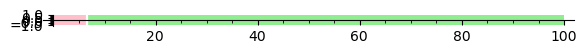

In [18]:
G(RIF("[0, 4]"), Atomic(T_H > T_A + RIF("0.05") )).signal_for_system(fourpincubator, 100).plot()

### Reproducing data

In [19]:
plot_params = {
    'adaptive_tolerance': 1,
    'step': 1,
}

In [20]:
system2a = IntervalParametricModel(
    "T_H,T_A",
    [RIF("43.228486"), RIF("30.993974")],
    [
        (1/C_H)*(V*I - G_H*(T_H - T_A)),
        (1/C_A)*(G_H*(T_H - T_A) - G_B*(T_A - T_R)),
    ],
    {
        "C_H": RIF("243.45802367"),
        "C_A": RIF("68.20829072"),
        "V":   RIF("12.00"),
        "I":   RIF("10.45"),
        "T_R": RIF("21.25"),
        "G_H": RIF("0.87095429"),
        "G_B": RIF("0.73572788"),
    }
)

In [21]:
ra = system2a.reach(18,integration_method=IntegrationMethod.LOW_DEGREE)

In [22]:
ra(RIF("18"))

[51.4883000?, 32.578768?]

plot_points = 18
plot_points = 18


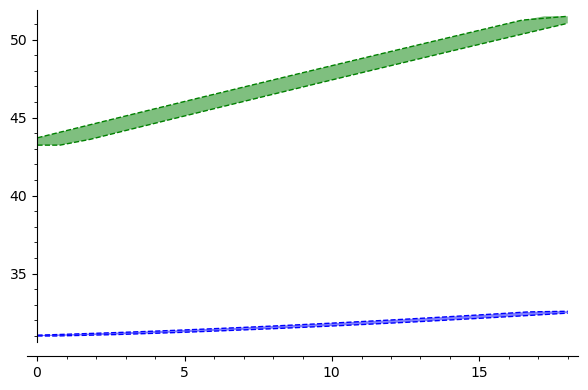

In [23]:
ra.sage_plot(T_A, color='blue', fillcolor='blue', linestyle="--", fill={0: [1]}, **plot_params) + ra.sage_plot(T_H, color='green', fillcolor='green', linestyle="--", fill={0: [1]}, **plot_params)

No V*I term with heater off:

In [24]:
system2b = IntervalParametricModel(
    "T_H,T_A",
    [RIF("52.62302203432049"), RIF("32.949245152726036")],
    [
        (1/C_H)*( - G_H*(T_H - T_A)),
        (1/C_A)*(G_H*(T_H - T_A) - G_B*(T_A - T_R)),
    ],
    {
        "C_H": RIF("243.45802367"),
        "C_A": RIF("68.20829072"),
        "V":   RIF("12.00"),
        "I":   RIF("10.45"),
        "T_R": RIF("21.25"),
        "G_H": RIF("0.87095429"),
        "G_B": RIF("0.73572788"),
    }
)
system2b.ode_table

\(\frac{\partial}{\partial t}T_{H}\left(t\right) = \frac{G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{H}}\)
\(\frac{\partial}{\partial t}T_{A}\left(t\right) = \frac{G_{B} {\left(T_{R} - T_{A}\left(t\right)\right)} - G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{A}}\)


In [25]:
rb = system2b.reach(1000, integration_method=IntegrationMethod.LOW_DEGREE)

plot_points = 1000
plot_points = 1000


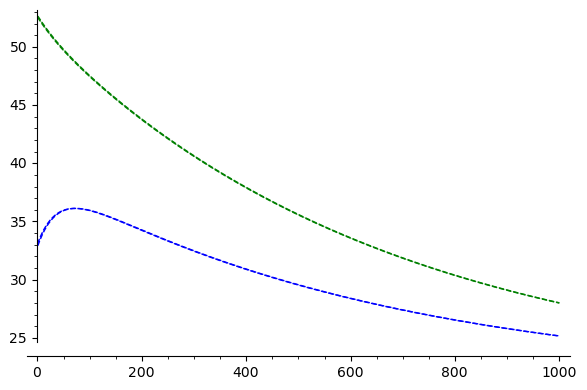

In [26]:
rb.sage_plot(T_A, color='blue', fillcolor='blue', linestyle="--", fill={0: [1]}, **plot_params) + rb.sage_plot(T_H, color='green', fillcolor='green', linestyle="--", fill={0: [1]}, **plot_params)

### Combined model with jump and time variable

In [27]:
system2a = IntervalParametricModel(
    "t,T_H,T_A",
    [RIF("102"), RIF("43.228486"), RIF("30.993974")],
    [
        1,
        (1/C_H)*(V*I - G_H*(T_H - T_A)),
        (1/C_A)*(G_H*(T_H - T_A) - G_B*(T_A - T_R)),
    ],
    {
        "C_H": RIF("243.45802367"),
        "C_A": RIF("68.20829072"),
        "V":   RIF("12.00"),
        "I":   RIF("10.45"),
        "T_R": RIF("21.25"),
        "G_H": RIF("0.87095429"),
        "G_B": RIF("0.73572788"),
    }
)

In [28]:
ra = system2a.reach(18, integration_method=IntegrationMethod.LOW_DEGREE)

In [29]:
ra(RIF("0"))

[102, 43.2284860000?, 30.9939740000?]

In [30]:
ra(RIF("18"))

[120.000000000?, 51.4883000?, 32.578768?]

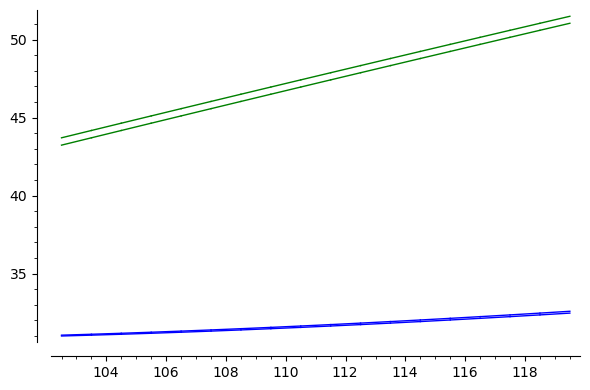

In [31]:
pra = ra.sage_tube_plot('t', 'T_A', step=1, straight=True, joins=False, color='blue') + ra.sage_tube_plot('t', 'T_H', step=1, straight=True, joins=False, color='green'); pra

No V*I term with heater off:

In [32]:
system2b = IntervalParametricModel(
    "t,T_H,T_A",
    ra(RIF("18")),
    [
        1,
        (1/C_H)*( - G_H*(T_H - T_A)),
        (1/C_A)*(G_H*(T_H - T_A) - G_B*(T_A - T_R)),
    ],
    {
        "C_H": RIF("243.45802367"),
        "C_A": RIF("68.20829072"),
        "V":   RIF("12.00"),
        "I":   RIF("10.45"),
        "T_R": RIF("21.25"),
        "G_H": RIF("0.87095429"),
        "G_B": RIF("0.73572788"),
    }
)
system2b.ode_table

\(\frac{\partial}{\partial t}t\left(t\right) = 1\)
\(\frac{\partial}{\partial t}T_{H}\left(t\right) = \frac{G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{H}}\)
\(\frac{\partial}{\partial t}T_{A}\left(t\right) = \frac{G_{B} {\left(T_{R} - T_{A}\left(t\right)\right)} - G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{A}}\)


In [33]:
rb = system2b.reach(477, integration_method=IntegrationMethod.LOW_DEGREE)

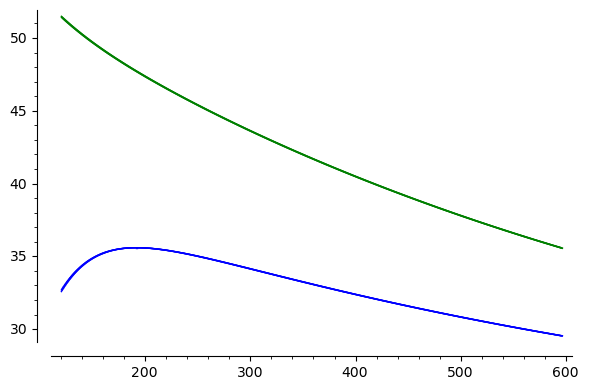

In [34]:
prb = rb.sage_tube_plot('t', 'T_A', step=1, straight=True, joins=False, color='blue') + rb.sage_tube_plot('t', 'T_H', step=1, straight=True, joins=False, color='green'); prb

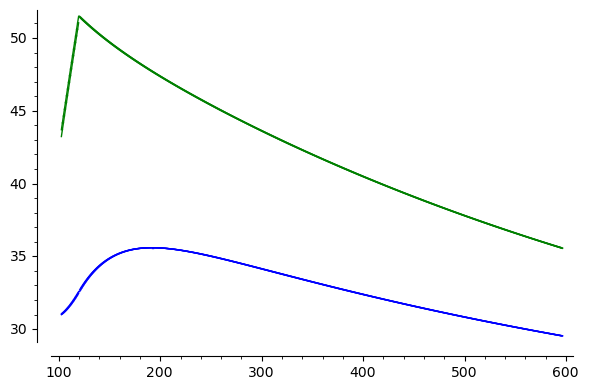

In [35]:
pra+prb

In [36]:
# prb = data.loc[40, 'time'] - data.loc[34, 'time']; prb

plot_points = 477
plot_points = 477


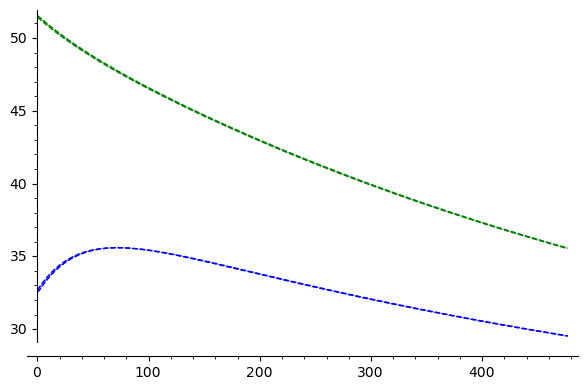

In [37]:
rb.sage_plot(T_A, color='blue', fillcolor='blue', linestyle="--", fill={0: [1]}, **plot_params) + rb.sage_plot(T_H, color='green', fillcolor='green', linestyle="--", fill={0: [1]}, **plot_params)

### Single example rough parametric system model

In [38]:
def systemp(x0, heater_on):
    return IntervalParametricModel(
        "t,T_H,T_A",
        x0,
        [
            1,
            (1/C_H)*(int(heater_on)*V*I - G_H*(T_H - T_A)),
            (1/C_A)*(G_H*(T_H - T_A) - G_B*(T_A - T_R)),
        ],
        {
            "C_H": RIF("243.45802367"),
            "C_A": RIF("68.20829072"),
            "V":   RIF("12.00"),
            "I":   RIF("10.45"),
            "T_R": RIF("21.25"),
            "G_H": RIF("0.87095429"),
            "G_B": RIF("0.73572788"),
        }
    )

In [39]:
on_time, off_time = 22,31

In [40]:
rs = []

In [41]:
rs.append(systemp([0, RIF('25'), RIF('22.5935')], True).reach(on_time, integration_method=IntegrationMethod.LOW_DEGREE))

In [42]:
rs.append(systemp(rs[-1](on_time), False).reach(off_time, integration_method=IntegrationMethod.LOW_DEGREE))

In [43]:
rs.append(systemp(rs[-1](off_time), True).reach(on_time, integration_method=IntegrationMethod.LOW_DEGREE))

In [44]:
rs.append(systemp(rs[-1](on_time), False).reach(off_time, integration_method=IntegrationMethod.LOW_DEGREE))

In [45]:
rs.append(systemp(rs[-1](off_time), True).reach(on_time, integration_method=IntegrationMethod.LOW_DEGREE))

In [46]:
rs.append(systemp(rs[-1](on_time), False).reach(477, integration_method=IntegrationMethod.LOW_DEGREE))

In [47]:
rs

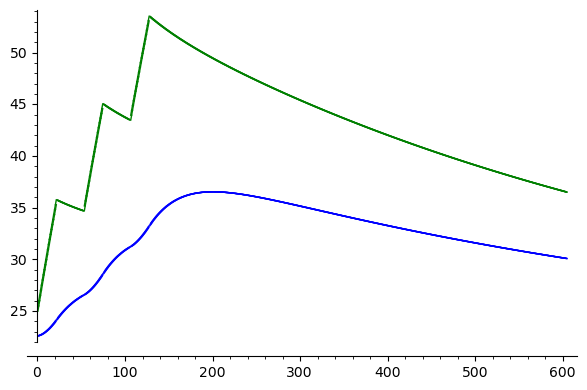

In [48]:
g1 = sum(
    (  r.sage_tube_plot('t', 'T_A', step=1, straight=True, joins=False, color='blue')
     + r.sage_tube_plot('t', 'T_H', step=1, straight=True, joins=False, color='green')
     for r in rs),
    Graphics()
)
g1

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv("./notebooks/model_test_data.csv", index_col=0)
df = df.loc[df['time'] <= 600]
df

,time,execution_interval,heater_on,fan_on,t1,time_t1,t2,time_t2,t3,time_t3,elapsed,timestamp,power_in,energy_in,average_temperature,avg_temp_kelvin,potential_energy,lid_open
0,0.000000,3,False,False,21.250,1.608640e+09,23.062,1.608640e+09,22.125,1.608640e+09,2.630852,2020-12-22 12:23:16.000302848,0.0,0.000000,22.5935,295.7435,0.000,0.0
1,3.119963,3,True,True,21.250,1.608640e+09,23.125,1.608640e+09,22.187,1.608640e+09,2.750368,2020-12-22 12:23:19.120266240,125.4,195.621706,22.6560,295.8060,1.750,0.0
2,5.999978,3,True,True,21.250,1.608640e+09,23.437,1.608640e+09,22.312,1.608640e+09,2.630082,2020-12-22 12:23:22.000281088,125.4,556.775574,22.8745,296.0245,7.868,0.0
3,9.039983,3,True,True,21.250,1.608640e+09,23.750,1.608640e+09,22.500,1.608640e+09,2.669633,2020-12-22 12:23:25.040285696,125.4,937.992137,23.1250,296.2750,14.882,0.0
4,12.000037,3,True,True,21.250,1.608640e+09,24.187,1.608640e+09,22.687,1.608640e+09,2.629303,2020-12-22 12:23:28.000339456,125.4,1309.182899,23.4370,296.5870,23.618,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,585.120023,3,False,True,21.312,1.608640e+09,30.375,1.608640e+09,30.187,1.608640e+09,2.666753,2020-12-22 12:33:01.120326144,0.0,7895.235055,30.2810,303.4310,215.250,0.0
196,588.080744,3,False,True,21.312,1.608640e+09,30.375,1.608640e+09,30.062,1.608640e+09,2.627111,2020-12-22 12:33:04.081046784,0.0,7895.235055,30.2185,303.3685,213.500,0.0
197,591.120177,3,False,True,21.312,1.608640e+09,30.312,1.608640e+09,30.062,1.608640e+09,2.666098,2020-12-22 12:33:07.120479488,0.0,7895.235055,30.1870,303.3370,212.618,0.0
198,594.079976,3,False,True,21.312,1.608640e+09,30.250,1.608640e+09,30.000,1.608640e+09,2.625489,2020-12-22 12:33:10.080278528,0.0,7895.235055,30.1250,303.2750,210.882,0.0


In [51]:
dfs = pd.read_csv("./notebooks/model_simulated_data.csv", index_col=0)
dfs.loc[:, 'time'] = dfs.loc[:, 'time'] - list(dfs['time'])[0]
dfs = dfs.loc[dfs['time'] <= 600]
dfs

,time,der_time,in_heater_on,in_heater_voltage,in_heater_current,in_room_temperature,power_in,G_box,T,power_out_box,total_power_box,der_T,T_heater,power_transfer_heat,total_power_heater,der_T_heater
0,-0.000000,1.0,False,12.0,10.45,21.250,0.0,0.735728,22.593500,0.988450,1.107501,0.016237,25.000000,2.095951,-2.095951,-0.008609
1,4.571125,1.0,True,12.0,10.45,21.250,125.4,0.735728,22.668311,1.043491,1.571021,0.023033,25.670204,2.614512,122.785488,0.504339
2,7.571125,1.0,True,12.0,10.45,21.250,125.4,0.735728,22.763237,1.113331,2.729631,0.040019,27.175595,3.842962,121.557038,0.499294
3,10.571125,1.0,True,12.0,10.45,21.250,125.4,0.735728,22.907084,1.219163,3.796758,0.055664,28.666194,5.015921,120.384079,0.494476
4,13.571125,1.0,True,12.0,10.45,21.250,125.4,0.735728,23.095981,1.358139,4.779197,0.070068,30.142661,6.137336,119.262664,0.489870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,586.571125,1.0,False,12.0,10.45,21.312,0.0,0.735728,30.018043,6.405279,-0.887260,-0.013008,36.353644,5.518019,-5.518019,-0.022665
196,589.571125,1.0,False,12.0,10.45,21.312,0.0,0.735728,29.979095,6.376624,-0.883769,-0.012957,36.285803,5.492854,-5.492854,-0.022562
197,592.571125,1.0,False,12.0,10.45,21.312,0.0,0.735728,29.940302,6.348082,-0.880257,-0.012905,36.218272,5.467825,-5.467825,-0.022459
198,595.571125,1.0,False,12.0,10.45,21.312,0.0,0.735728,29.901663,6.319655,-0.876725,-0.012854,36.151049,5.442929,-5.442929,-0.022357


In [52]:
dfs.loc[0:6,:]

,time,der_time,in_heater_on,in_heater_voltage,in_heater_current,in_room_temperature,power_in,G_box,T,power_out_box,total_power_box,der_T,T_heater,power_transfer_heat,total_power_heater,der_T_heater
0,-0.000000,1.0,False,12.0,10.45,21.25,0.0,0.735728,22.593500,0.988450,1.107501,0.016237,25.000000,2.095951,-2.095951,-0.008609
1,4.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,22.668311,1.043491,1.571021,0.023033,25.670204,2.614512,122.785488,0.504339
2,7.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,22.763237,1.113331,2.729631,0.040019,27.175595,3.842962,121.557038,0.499294
3,10.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,22.907084,1.219163,3.796758,0.055664,28.666194,5.015921,120.384079,0.494476
4,13.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,23.095981,1.358139,4.779197,0.070068,30.142661,6.137336,119.262664,0.489870
5,16.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,23.326341,1.527622,5.683240,0.083322,31.605608,7.210862,118.189138,0.485460
6,19.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,23.594848,1.725170,6.514716,0.095512,33.055604,8.239886,117.160114,0.481233


In [53]:
list(dfs['time'])[6] - list(dfs['time'])[1]

14.999999999999998

In [54]:
dfs.loc[7:16,:]

,time,der_time,in_heater_on,in_heater_voltage,in_heater_current,in_room_temperature,power_in,G_box,T,power_out_box,total_power_box,der_T,T_heater,power_transfer_heat,total_power_heater,der_T_heater
7,22.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,23.898429,1.948523,7.279018,0.106717,34.493177,9.227541,116.172459,0.477177
8,25.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,24.228705,2.191516,7.372829,0.108093,35.210160,9.564345,-9.564345,-0.039285
9,28.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,24.539615,2.420261,6.772666,0.099294,35.094620,9.192927,-9.192927,-0.037760
10,31.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,24.825123,2.630317,6.217160,0.091150,34.983494,8.847478,-8.847478,-0.036341
11,34.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,25.087119,2.823075,5.703007,0.083612,34.876476,8.526083,-8.526083,-0.035021
12,37.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,25.327354,2.999823,5.227146,0.076635,34.773278,8.226969,-8.226969,-0.033792
13,40.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,25.547449,3.161753,4.786741,0.070178,34.673638,7.948494,-7.948494,-0.032648
14,43.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,25.748905,3.309970,4.379168,0.064203,34.577310,7.689137,-7.689137,-0.031583
15,46.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,25.933111,3.445496,4.001996,0.058673,34.484067,7.447492,-7.447492,-0.030590
16,49.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,26.101356,3.569278,3.652974,0.053556,34.393700,7.222252,-7.222252,-0.029665


In [55]:
list(dfs['time'])[16] - list(dfs['time'])[7]

26.999999999999982

In [56]:
dfs.loc[17:23,:]

,time,der_time,in_heater_on,in_heater_voltage,in_heater_current,in_room_temperature,power_in,G_box,T,power_out_box,total_power_box,der_T,T_heater,power_transfer_heat,total_power_heater,der_T_heater
17,52.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,26.254831,3.682193,3.330019,0.048821,34.306013,7.012212,-7.012212,-0.028803
18,55.571125,1.0,False,12.0,10.45,21.25,0.0,0.735728,26.394638,3.785054,3.031199,0.044440,34.220827,6.816253,-6.816253,-0.027998
19,58.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,26.527337,3.882684,3.363044,0.049305,34.846635,7.245728,118.154272,0.485317
20,61.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,26.697302,4.007732,4.352007,0.063805,36.295670,8.359740,117.040260,0.480741
21,64.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,26.909011,4.163492,5.262208,0.077149,37.731278,9.425700,115.974300,0.476363
22,67.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,27.159128,4.347510,6.099500,0.089425,39.154029,10.447011,114.952989,0.472168
23,70.571125,1.0,True,12.0,10.45,21.25,125.4,0.735728,27.444569,4.557517,6.869303,0.100711,40.564454,11.426820,113.973180,0.468143


In [57]:
list(dfs['time'])[23] - list(dfs['time'])[17]

17.999999999999986

In [58]:
list(dfs['time'])[0]

-0.0

<AxesSubplot:xlabel='time'>

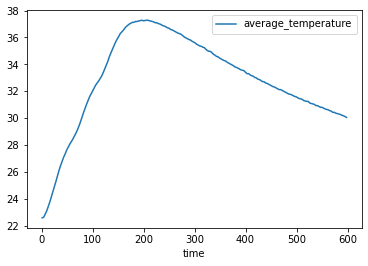

In [59]:
df.plot('time', 'average_temperature')

<AxesSubplot:xlabel='time'>

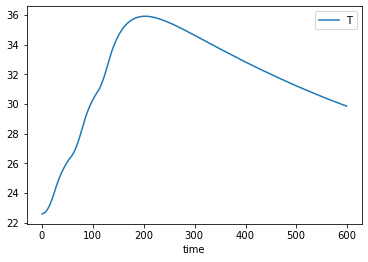

In [60]:
dfs.plot('time', 'T')

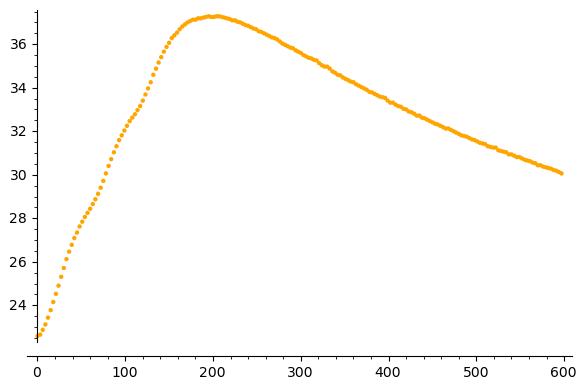

In [61]:
g2 = points(zip(df.loc[:,'time'], df.loc[:,'average_temperature']), color='orange'); g2

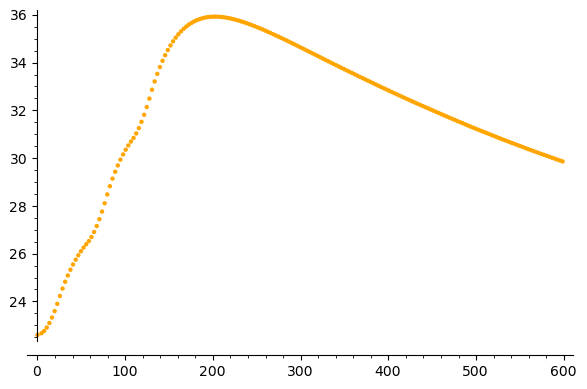

In [62]:
g3 = points(zip(dfs.loc[:,'time'], dfs.loc[:,'T']), color='orange'); g3

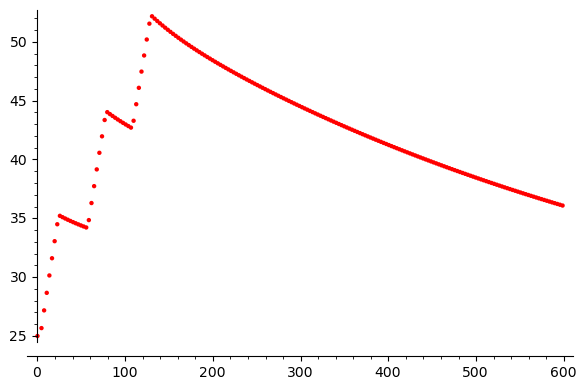

In [63]:
g4 = points(zip(dfs.loc[:,'time'], dfs.loc[:,'T_heater']), color='red'); g4

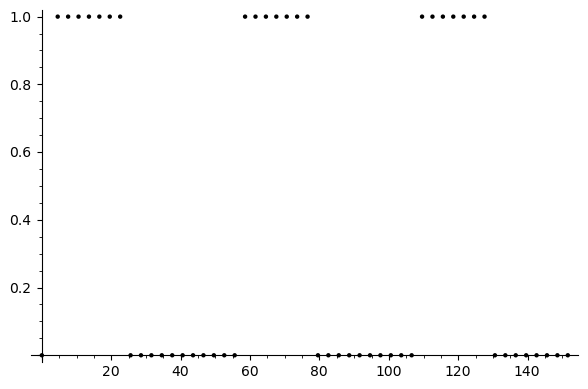

In [64]:
g5 = points(zip(dfs.loc[:50,'time'], dfs.loc[:50,'in_heater_on']), color='black'); g5

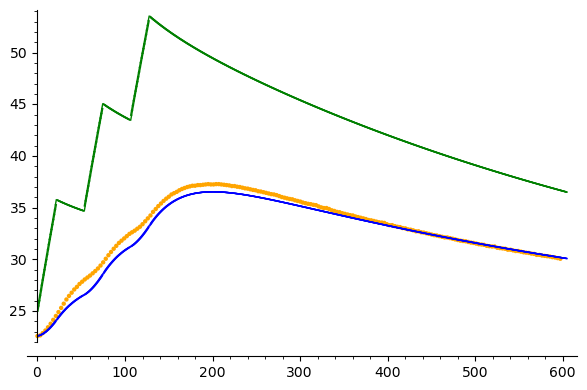

In [65]:
g1 + g2

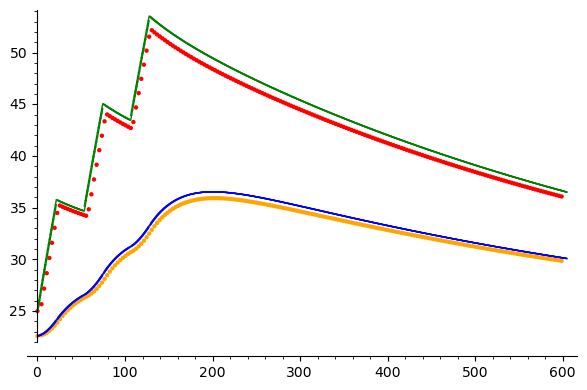

In [66]:
g1 + g3 + g4

## Next Steps:

 1. STL monitoring over a sequence of separate reach sets
 2. Generating a sequence of separate reach sets from an existing dataset of switches
 3. Generating a sequence of reach sets based on as controller and a fixed time step
 
Initial focus should be on 2 and 3 in order to make it possible to test 1
 
We should have a version of the class for each of the the different parametric models and use mixins to define the control flow based either on the specific stepping data or on a given controller model. We do need to compute the next control control wait: this information should also be conveyed by the control step function.

*An important change:* Should the next time should be a floating point number or a real? Otherwise we have real problems with non-deterministic control decisions.

How tightly coupled should we be to the underlying dynamics?

## 7 Parameter Model

In [61]:
sevenpincubator.ode_table

\(\frac{\partial}{\partial t}T_{H}\left(t\right) = \frac{I V + G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{H}}\)
\(\frac{\partial}{\partial t}T_{A}\left(t\right) = \frac{G_{B} {\left(T_{R} - T_{A}\left(t\right)\right)} - G_{F} {\left(T_{A}\left(t\right) - T_{F}\left(t\right)\right)} - G_{H} {\left(T_{A}\left(t\right) - T_{H}\left(t\right)\right)}}{C_{A}}\)
\(\frac{\partial}{\partial t}T_{F}\left(t\right) = -\frac{G_{F} {\left(T_{A}\left(t\right) - T_{F}\left(t\right)\right)}}{C_{F}}\)


In [62]:
r = sevenpincubator.reach(100)

plot_points = 10000
plot_points = 10000
plot_points = 10000


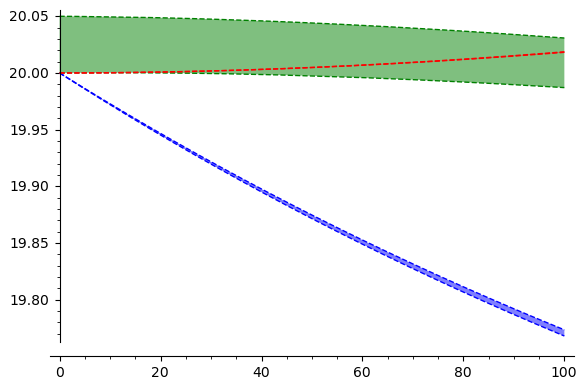

In [63]:
  r.sage_plot(T_A, color='blue', fillcolor='blue', linestyle="--", fill={0: [1]})\
+ r.sage_plot(T_H, color='green', fillcolor='green', linestyle="--", fill={0: [1]})\
+ r.sage_plot(T_F, color='red', fillcolor='red', linestyle="--", fill={0: [1]})